# 0. configurando o ambiente

In [79]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Realizando exploração inicial de dados

## 1.1 Carregando dataset inicial

In [2]:
#carregando o dataset inicial
bangalore_df = pd.read_csv('datasets/housing/housing_Bangalore.csv')
bangalore_df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [9]:
print("Informações do dataset:")
print("Linhas e Colunas (linha, coluna): " + str(bangalore_df.shape))
print("Colunas: " + str(bangalore_df.columns))

Informações do dataset:
Linhas e Colunas (linha, coluna): (6207, 40)
Colunas: Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')


## 1.2 Visualizando a disposição dos dados no dataset

- Para dados discretos utiliza-se histograma com a frequencia de aparição
- Para dados continuos utiliza-se boxplot para observar a distribuição


In [11]:
bangalore_df.info() #informações de cada coluna do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6207 entries, 0 to 6206
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                6207 non-null   int64 
 1   Area                 6207 non-null   int64 
 2   Location             6207 non-null   object
 3   No. of Bedrooms      6207 non-null   int64 
 4   Resale               6207 non-null   int64 
 5   MaintenanceStaff     6207 non-null   int64 
 6   Gymnasium            6207 non-null   int64 
 7   SwimmingPool         6207 non-null   int64 
 8   LandscapedGardens    6207 non-null   int64 
 9   JoggingTrack         6207 non-null   int64 
 10  RainWaterHarvesting  6207 non-null   int64 
 11  IndoorGames          6207 non-null   int64 
 12  ShoppingMall         6207 non-null   int64 
 13  Intercom             6207 non-null   int64 
 14  SportsFacility       6207 non-null   int64 
 15  ATM                  6207 non-null   int64 
 16  ClubHo

In [21]:
temp_continous = bangalore_df.select_dtypes(include=['float64', 'int64'])
temp_discrete = bangalore_df.select_dtypes(include=['object'])

In [25]:
temp_discrete.shape
#Somente uma coluna com dados discretos

(6207, 1)

In [24]:
temp_continous.shape
# 39 colunas com dados contínuos

(6207, 39)

In [45]:
temp_discrete['Location'].duplicated().value_counts()
# 5905 endereços duplicados


True     5905
False     302
Name: Location, dtype: int64

In [48]:
temp_discrete['Location'].value_counts().count()
# 302 endereços únicos

302

In [53]:
temp_discrete['Location'].value_counts().head(10)
# 10 endereços com mais imóveis

Electronic City Phase 2             232
RR Nagar                            217
Begur                               186
Varthur                             168
Kumaraswamy Layout                  154
Attibele                            151
Narayanapura on Hennur Main Road    148
Electronic City Phase 1             139
Harlur                              135
Krishnarajapura                     131
Name: Location, dtype: int64

In [54]:
# Possuimos 39 colunas com dados contínuos, vamos observar a distribuição dos dados de cada coluna
temp_continous.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,6.207000e+03,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,...,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000
mean,1.058510e+07,1526.094248,2.556952,0.078782,6.208797,6.461576,6.436121,6.382471,6.396649,6.373933,...,6.438537,6.211052,6.311100,6.210569,6.181569,6.210569,6.210569,6.210569,6.171097,6.210569
std,1.410943e+07,764.845609,0.694300,0.269420,4.126883,3.752421,3.792567,3.875271,3.853661,3.888204,...,3.788782,4.123761,3.981513,4.124430,4.164294,4.124430,4.124430,4.124430,4.178546,4.124430
min,2.000000e+06,415.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000e+06,1110.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.368000e+06,1340.000000,3.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,1.070000e+07,1662.500000,3.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,3.000000e+08,9900.000000,7.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [57]:
# Podemos observar ainda a distribuição dos dados de cada coluna através dos violinplot
# Note que possuimos 39 colunas, podemos representar elas com 39 violinplot, porém isso não é muito prático
# Podemos representar o numero 39 por uma equação 5*8 - 1, ou seja, uma coluna com 5 colunas e 8 linhas com um espaço vazio

# Vamos criar uma função para plotar os violinplot
def plot_boxplot(df, colunas, linhas, figsize):
    fig, axes = plt.subplots(linhas, colunas, figsize = figsize)
    axes = axes.ravel()
    for idx, ax in enumerate(axes):
        ax.figure
        coluna = df.columns[idx]
        ax.violinplot(df[coluna])
        ax.set_title(coluna)
    plt.tight_layout()

IndexError: index 39 is out of bounds for axis 0 with size 39

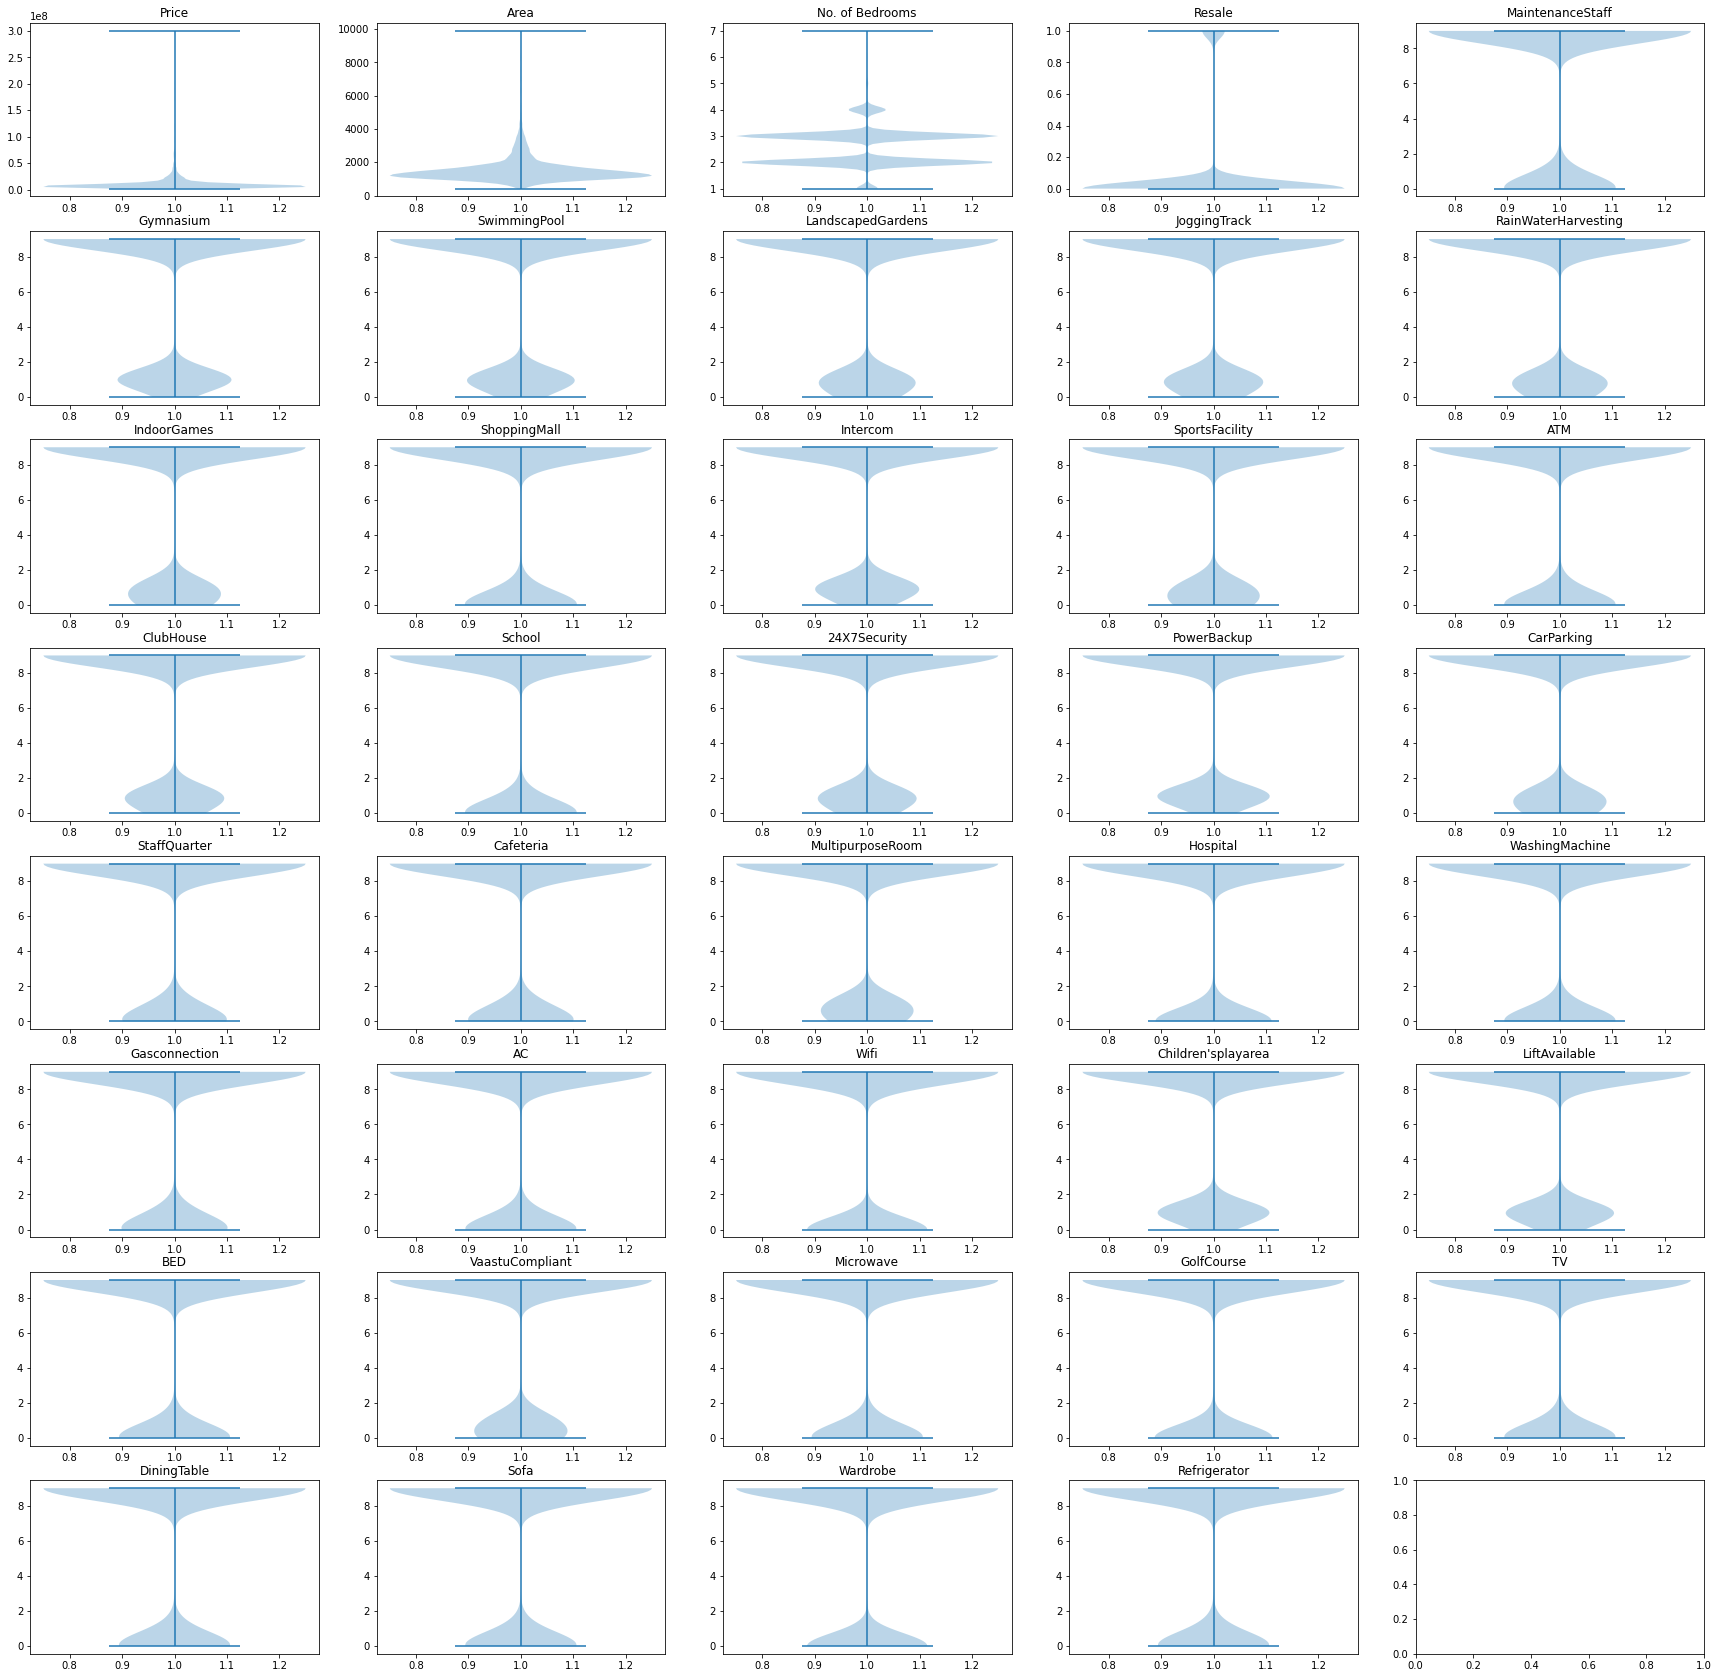

In [60]:
plot_boxplot(temp_continous, 5, 8, (30,30))

In [65]:
#Alguns graficos possuem logica de distribuição, como o número de quartos, banheiros, vagas de garagem, etc
#Outros são dados do tipo boolean (sim ou não), como o SwimmingPool, Furnished, etc
#Note que esses dados deveriam ser representados somente como 1 e 0, porém há dados representado como o numero 9
#Ao verificar a documentação do dataset, vemos que o 9 significa que o imóvel não teve a caracteristica informada
temp_continous['SwimmingPool'].value_counts()

9    4256
1    1645
0     306
Name: SwimmingPool, dtype: int64

## 1.3 limpeza de dados

In [73]:
bangalore_df.isnull().sum().sum()
#Não possuimos dados nulos, mas como mostrado anteriormente os valores 9 representam dados nulos
#Para resolver isso, vamos substituir os valores 9 por 0, pois mais a frente vamos utilizar o algoritmo de regressão linear
#E o algoritmo necessariamente precisa de valores precisos. Mesmo o 9 sendo um valor não nulo ele representa um valor nulo

bangalore_df = bangalore_df.apply(lambda x: x.replace(9, 0), axis=1)
bangalore_df['SwimmingPool'].value_counts()
#Não há mais o valor 9 no dataset

0    4562
1    1645
Name: SwimmingPool, dtype: int64

# 2. Analise de Dados
## 2.1 Verificando correlação entre as colunas

In [78]:
#Vamos verificar a correlação entre as colunas
#Para isso vamos utilizar o método corr()
#O método corr() retorna uma matriz de correlação entre as colunas
#O valor 1 significa que as colunas são iguais
#O valor -1 significa que as colunas são inversamente proporcionais
#O valor 0 significa que as colunas não possuem correlação

corr = temp_continous.corr() #matriz de correlação com os dados continuos
corr.head()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
Price,1.000000,0.397626,0.234272,-0.038024,0.030497,0.031976,0.034450,0.029744,0.035339,0.033558,...,0.028814,0.033519,0.029598,0.033460,0.031330,0.033460,0.033460,0.033460,0.030335,0.033460
Area,0.397626,1.000000,0.733010,0.021379,0.008910,0.011436,0.014659,0.011841,0.016572,0.012948,...,0.008811,0.013280,0.010232,0.013166,0.010982,0.013166,0.013166,0.013166,0.009288,0.013166
No. of Bedrooms,0.234272,0.733010,1.000000,-0.015806,0.024080,0.027791,0.031352,0.028554,0.030822,0.028072,...,0.025848,0.027655,0.025736,0.027576,0.025264,0.027576,0.027576,0.027576,0.024300,0.027576
Resale,-0.038024,0.021379,-0.015806,1.000000,-0.034941,-0.032628,-0.034735,-0.032260,-0.032120,-0.029972,...,-0.030221,-0.036578,-0.026156,-0.036538,-0.034582,-0.036538,-0.036538,-0.036538,-0.033874,-0.036538
MaintenanceStaff,0.030497,0.008910,0.024080,-0.034941,1.000000,0.998428,0.997825,0.997381,0.997509,0.997057,...,0.997388,0.998145,0.996514,0.998159,0.998736,0.998159,0.998159,0.998159,0.999025,0.998159


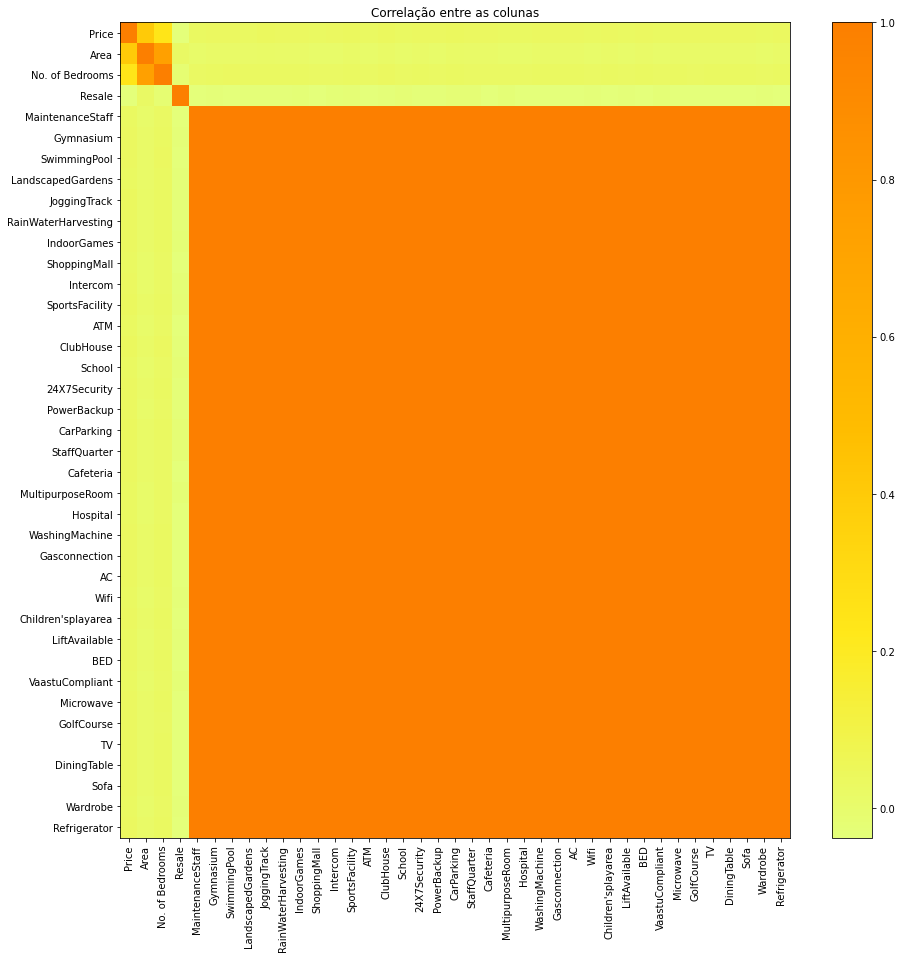

In [111]:
#Com a tabela de correlação podemos observar como os dados se comportam entre si
#Vamos plotar um heatmap para melhor visualização
fig, ax = plt.subplots(figsize=(15,15)) 
plt.xticks(ticks=np.arange(len(temp_continous.columns)), labels = temp_continous.columns, rotation=90) #Criando os ticks para o eixo x
plt.yticks(ticks=np.arange(len(temp_continous.columns)), labels = temp_continous.columns) #Criando os ticks para o eixo y
plt.imshow(corr, cmap='Wistia', interpolation='nearest', aspect='auto') #Plotando o heatmap com a matriz de correlação
plt.title('Correlação entre as colunas') #Adicionando um título
plt.colorbar() #Adicionando a barra de cores